<a href="https://colab.research.google.com/github/naufalnashif/test-case/blob/main/telkomsel/sql_test_naufalnashif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL Test Case with SQL and Python

cc : [Naufal Nashif](https://www.linkedin.com/in/naufalnashif/)
| files : [Github](https://github.com/naufalnashif/test-case/tree/c7834a26f2cb0bf193fa1a37154b644f4ac432c4/telkomsel)

In [ ]:
import duckdb
import os
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

folder_path = "./raw data"
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        table_name = file_name.replace(".csv", "").lower()
        file_path = os.path.join(folder_path, file_name)


        duckdb.query(f"""
            CREATE TEMPORARY TABLE {table_name} AS
            SELECT * FROM read_csv_auto('{file_path}')
        """)

def execute_query(query):
    try:
        result = duckdb.query(query).to_df()
        return result
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

### Page 1


Creating 10 tasks that encompass various aspects of SQL, such as joins, aggregations, subqueries, and data analysis.


- Task 1: Join Sales and Dealer Data  
  Objective: Combine sales data with dealer information and calculate total sales for each dealer.

- Task 2: Dealer Sales by Product  
  Objective: Find the total sales for each product by each dealer.

- Task 3: Sales Forecast Accuracy  
  Objective: Compare actual sales with forecasted sales for each dealer and product.

- Task 4: Product Margin Analysis  
  Objective: Calculate the total sales and average margin for each product.

- Task 5: Dealer Performance Analysis  
  Objective: Analyze the performance of dealers based on their age and total sales.

- Task 6: Dealer Subscription Effect on Sales  
  Objective: Determine the effect of subscription to credit services on dealer sales.

- Task 7: Monthly Sales Trend Analysis  
  Objective: Analyze the monthly sales trend for each dealer.

- Task 8: Storage Capacity and Sales Correlation  
  Objective: Analyze if there's a correlation between storage capacity and total sales.

- Task 9: Sales Aggregation with Conditional Logic  
  Objective: Calculate total sales, categorizing dealers based on whether they are road facing.

- Task 10: Advanced Dealer Performance Analysis  
  Objective: Perform a complex analysis involving multiple tables to find dealers with above-average income and their total sales.

##### Task 1: Join Sales and Dealer Data
_Objective: Combine sales data with dealer information and calculate total sales for each dealer._

In [ ]:
query1_task1 = """
SELECT
    d."Dealer",
    d."Storage Capacity",
    d."Road Facing",
    d."Store Count",
    d."Dealer Age",
    d."Dealer Income",
    d."Subscription to Credit services",
    SUM(s."Sales") AS total_sales
FROM salesdata s
RIGHT JOIN dealerdata d
    USING ("Dealer")
GROUP BY
    d."Dealer",
    d."Storage Capacity",
    d."Road Facing",
    d."Store Count",
    d."Dealer Age",
    d."Dealer Income",
    d."Subscription to Credit services"
ORDER BY d."Dealer";
"""
query2_task1 = f"""
select
	sq1."Dealer" ,
	d."Storage Capacity",
	d."Road Facing" ,
	d."Store Count" ,
	d."Dealer Age" ,
	d."Dealer Income" ,
	d."Subscription to Credit services" ,
	sq1.total_sales
from (
	select
		s."Dealer",
		sum("Sales") as total_sales
	from salesdata s
	group by s."Dealer"
	order by s."Dealer"
) sq1
left join dealerdata d on sq1."Dealer" = d."Dealer";
"""

print('Tabel with right join : ')
display(execute_query(query1_task1))

print('Tabel with CTE & left join : ')
display(execute_query(query2_task1))

Tabel with right join : 


,Dealer,Storage Capacity,Road Facing,Store Count,Dealer Age,Dealer Income,Subscription to Credit services,total_sales
0,1001,1099,0,2,31,169338,1,1009.0
1,1002,1423,0,4,27,224240,0,1248.0
2,1003,1278,0,3,35,203952,0,694.0
3,1004,1209,1,1,37,83899,1,1143.0
4,1005,1480,0,3,29,224715,0,1182.0
...,...,...,...,...,...,...,...,...
645,1646,1351,0,1,51,87900,0,690.0
646,1647,1146,1,3,23,295755,1,548.0
647,1648,1301,0,2,31,188092,0,1709.0
648,1649,1301,1,5,30,349850,0,1295.0


Tabel with CTE & left join : 


,Dealer,Storage Capacity,Road Facing,Store Count,Dealer Age,Dealer Income,Subscription to Credit services,total_sales
0,1001,1099,0,2,31,169338,1,1009.0
1,1002,1423,0,4,27,224240,0,1248.0
2,1003,1278,0,3,35,203952,0,694.0
3,1004,1209,1,1,37,83899,1,1143.0
4,1005,1480,0,3,29,224715,0,1182.0
...,...,...,...,...,...,...,...,...
645,1554,1445,1,4,51,233240,1,1018.0
646,1601,1311,1,3,57,200262,0,1886.0
647,1203,1508,1,1,45,62834,0,1823.0
648,1448,1662,0,1,48,98456,0,1242.0


##### Task 2: Dealer Sales by Product
_Objective: Find the total sales for each product by each dealer._

In [ ]:
query_task2 = """
select
	s."Dealer",
	s."Product",
	sum("Sales") as total_sales
from salesdata s
group by s."Product", s."Dealer"
order by s."Dealer", s."Product";
"""

execute_query(query_task2)

,Dealer,Product,total_sales
0,1001,1011,240.0
1,1001,1203,97.0
2,1001,1237,125.0
3,1001,1389,13.0
4,1001,1443,26.0
...,...,...,...
10946,1650,2457,269.0
10947,1650,2514,0.0
10948,1650,2550,49.0
10949,1650,2826,31.0


##### Task 3: Sales Forecast Accuracy
_Objective: Compare actual sales with forecasted sales for each dealer and product._

In [ ]:
query_task3 = """
select
	s."Dealer" ,
	s."Product",
	SUM(s."Sales") as total_sales,
	SUM(f."FC") as total_forecast,
	AVG(ABS(s."Sales" - f."FC")) as mae,
	ROUND(AVG((ABS(s."Sales" - f."FC")::decimal / NULLIF(s."Sales", 0)) * 100), 2) AS mape,
	ROUND(100 - LEAST(AVG((ABS(s."Sales" - f."FC")::decimal / NULLIF(s."Sales", 0)) * 100), 100), 2) AS accuracy
from salesdata s
left join forecast f on s."Dealer" = f."Dealer" and s."Product" = f."Product"
group by s."Dealer", s."Product"
order by s."Dealer", s."Product";
"""

execute_query(query_task3)

,Dealer,Product,total_sales,total_forecast,mae,mape,accuracy
0,1001,1011,240.0,246.0,6.0,2.50,97.50
1,1001,1203,97.0,106.0,9.0,9.28,90.72
2,1001,1237,125.0,131.0,6.0,4.80,95.20
3,1001,1389,13.0,293.0,280.0,2153.85,0.00
4,1001,1443,26.0,71.0,45.0,173.08,0.00
...,...,...,...,...,...,...,...
10946,1650,2457,269.0,275.0,6.0,2.23,97.77
10947,1650,2514,0.0,6.0,6.0,NaN,0.00
10948,1650,2550,49.0,54.0,5.0,10.20,89.80
10949,1650,2826,31.0,60.0,29.0,93.55,6.45


##### Task 4: Product Margin Analysis
_Objective: Calculate the total sales and average margin for each product._

In [ ]:
query_task4 = """
select
	s."Product",
	SUM(s."Sales") as total_sales,
	AVG(p."Margin") as avg_margin
from salesdata s
left join productdata p using("Product")
group by s."Product"
order by s."Product" ;
"""

execute_query(query_task4)

,Product,total_sales,avg_margin
0,1001,477.0,12.0
1,1002,199.0,12.0
2,1003,161.0,14.0
3,1004,166.0,14.0
4,1005,428.0,11.0
...,...,...,...
1988,2996,510.0,11.0
1989,2997,266.0,10.0
1990,2998,279.0,13.0
1991,2999,269.0,15.0


##### Task 5: Dealer Performance Analysis
_Objective: Analyze the performance of dealers based on their age and total sales._

In [ ]:
query1_task5 = """
select
	d."Dealer Age" ,
	count(d."Dealer") as total_dealer,
	SUM(s."Sales") as total_sales,
	AVG(s."Sales") as avg_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Dealer Age"
order by total_sales DESC;
"""
query2_task5 = """
select
	d."Dealer Age" ,
	count(d."Dealer") as total_dealer,
	SUM(s."Sales") as total_sales,
	AVG(s."Sales") as avg_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Dealer Age"
order by d."Dealer Age";
"""
print('Tabel 1: Order by Total Sales DESC')
display(execute_query(query1_task5))

print('Tabel 2: Order by Dealer Age ASC')
display(execute_query(query2_task5))

Tabel 1: Order by Total Sales DESC


,Dealer Age,total_dealer,total_sales,avg_sales
0,56,395,30132.0,76.283544
1,51,392,29553.0,75.390306
2,31,361,28816.0,79.822715
3,29,361,27757.0,76.889197
4,60,346,26642.0,77.000000
5,36,371,26031.0,70.164420
6,25,341,25708.0,75.390029
7,42,331,25689.0,77.610272
8,47,329,25638.0,77.927052
9,30,334,24561.0,73.535928


Tabel 2: Order by Dealer Age ASC


,Dealer Age,total_dealer,total_sales,avg_sales
0,21,251,19026.0,75.800797
1,22,212,16441.0,77.551887
2,23,231,14636.0,63.359307
3,24,263,19579.0,74.444867
4,25,341,25708.0,75.390029
5,26,201,14326.0,71.273632
6,27,292,21732.0,74.424658
7,28,222,18289.0,82.382883
8,29,361,27757.0,76.889197
9,30,334,24561.0,73.535928


Koefisien Korelasi antara Dealer Age dan Total Sales: 0.09


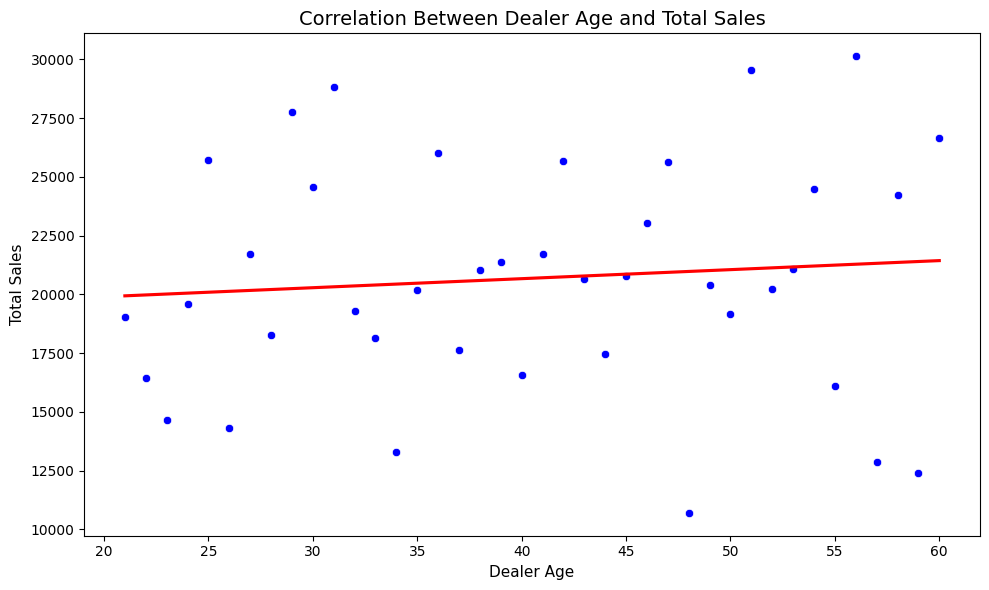

In [ ]:
result = execute_query(query1_task5)

correlation = result['Dealer Age'].corr(result['total_sales'])
print(f"Koefisien Korelasi antara Dealer Age dan Total Sales: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dealer Age", y="total_sales", data=result, color="blue")

# Add reg line
sns.regplot(x="Dealer Age", y="total_sales", data=result, scatter=False, color="red", ci=None)

# Add title
plt.title('Correlation Between Dealer Age and Total Sales', fontsize=14)
plt.xlabel('Dealer Age', fontsize=11)
plt.ylabel('Total Sales', fontsize=11)

plt.tight_layout()
plt.show()

##### Task 6: Dealer Subscription Effect on Sales
_Objective: Determine the effect of subscription to credit services on dealer sales._

In [ ]:
query_task6 = """
select
	d."Subscription to Credit services",
	SUM(s."Sales") as total_sales,
	COUNT(s."Dealer") as total_dealer,
	AVG(s."Sales") as avg_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Subscription to Credit services"
order by SUM(s."Sales") desc, AVG(s."Sales") DESC;
"""
display(execute_query(query_task6))

,Subscription to Credit services,total_sales,total_dealer,avg_sales
0,0,420211.0,5560,75.577518
1,1,407135.0,5439,74.854753


##### Task 7: Monthly Sales Trend Analysis.
_Analyze the monthly sales trend for each dealer._

In [ ]:
# Assume that each Payment Date corresponds to 1 sale, as there is no column for total_sales by month.
# Include 0 for months with no sales, rather than excluding dealers.
query_task7 = """
WITH cte_agg2 AS (
    SELECT
        p."DealerName",
        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment,
        EXTRACT(YEAR FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS year_payment
    FROM paymentdata p
),
cte_month_payment as (
    select distinct
        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment
    FROM paymentdata p
    order by month_payment
)
SELECT
    d."DealerName",
    m.month_payment,
    COALESCE(COUNT(a."DealerName"), 0) AS total_sales
FROM
	(SELECT DISTINCT "DealerName" FROM paymentdata) d
CROSS JOIN cte_month_payment m(month_payment)
LEFT JOIN cte_agg2 a ON a."DealerName" = d."DealerName" AND a.month_payment = m.month_payment
GROUP BY d."DealerName", m.month_payment
ORDER BY d."DealerName", m.month_payment;
"""
display(execute_query(query_task7))

,DealerName,month_payment,total_sales
0,1001,1,1
1,1001,2,9
2,1001,3,4
3,1002,1,0
4,1002,2,4
...,...,...,...
1945,1649,2,6
1946,1649,3,4
1947,1650,1,3
1948,1650,2,5


##### Task 8: Storage Capacity and Sales Correlation
_Objective: Analyze if there's a correlation between storage capacity and total sales._

In [ ]:
query_task8 = """
select
	d."Dealer",
	d."Storage Capacity",
	SUM(s."Sales") as total_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Dealer",
	d."Storage Capacity"
order by SUM(s."Sales") DESC;
"""

display(execute_query(query_task8))

,Dealer,Storage Capacity,total_sales
0,1539,1739,2615.0
1,1302,1253,2400.0
2,1386,1177,2356.0
3,1288,1658,2347.0
4,1454,1078,2273.0
...,...,...,...
645,1059,1276,418.0
646,1139,1239,387.0
647,1079,1178,331.0
648,1168,1425,273.0


Koefisien Korelasi antara Storage Capacity dan Total Sales: 0.03


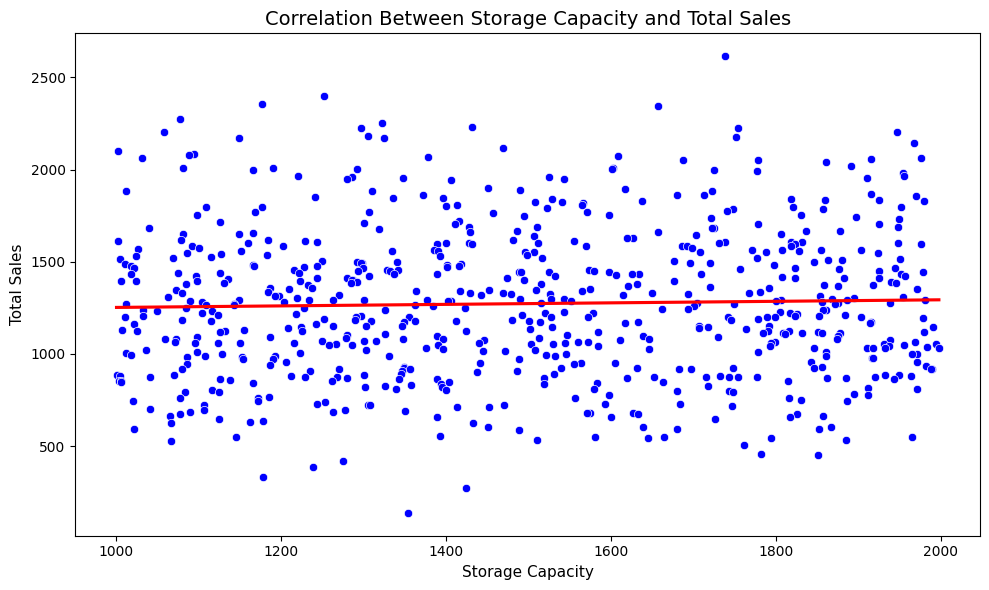

In [ ]:
result = execute_query(query_task8)

correlation = result['Storage Capacity'].corr(result['total_sales'])
print(f"Koefisien Korelasi antara Storage Capacity dan Total Sales: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Storage Capacity", y="total_sales", data=result, color="blue")

# Add reg line
sns.regplot(x="Storage Capacity", y="total_sales", data=result, scatter=False, color="red", ci=None)

# Add title
plt.title('Correlation Between Storage Capacity and Total Sales', fontsize=14)
plt.xlabel('Storage Capacity', fontsize=11)
plt.ylabel('Total Sales', fontsize=11)

plt.tight_layout()
plt.show()

##### Task 9: Sales Aggregation with Conditional Logic
_Objective: Calculate total sales, categorizing dealers based on whether they are road facing._

In [ ]:
query_task9 = """
select
	d."Road Facing",
	SUM(s."Sales") as total_sales,
	COUNT(s."Dealer") as total_dealer,
	AVG(s."Sales") as avg_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Road Facing"
order by SUM(s."Sales") desc, AVG(s."Sales") DESC;
"""
display(execute_query(query_task9))

,Road Facing,total_sales,total_dealer,avg_sales
0,1,433001.0,5756,75.226025
1,0,394345.0,5243,75.213618


##### Task 10: Advanced Dealer Performance Analysis
_Objective: Perform a complex analysis involving multiple tables to find dealers with above-average._

In [ ]:
query_task10 = """
WITH cte_join1 AS (
    SELECT
        d."Dealer",
        d."Storage Capacity",
        d."Road Facing",
        d."Store Count",
        d."Dealer Age",
        d."Dealer Income",
        d."Subscription to Credit services",
        SUM(s."Sales") AS total_sales
    FROM salesdata s
    RIGHT JOIN dealerdata d USING ("Dealer")
    GROUP BY
        d."Dealer",
        d."Storage Capacity",
        d."Road Facing",
        d."Store Count",
        d."Dealer Age",
        d."Dealer Income",
        d."Subscription to Credit services"
)
SELECT
    *
FROM cte_join1
WHERE
    "Dealer Income" > (SELECT AVG("Dealer Income") FROM cte_join1)
    AND total_sales > (SELECT AVG(total_sales) FROM cte_join1)
ORDER BY "Dealer";
"""
display(execute_query(query_task10))

,Dealer,Storage Capacity,Road Facing,Store Count,Dealer Age,Dealer Income,Subscription to Credit services,total_sales
0,1010,1808,1,3,27,287130,1,1564.0
1,1013,1390,0,4,44,358504,1,1434.0
2,1017,1025,0,5,53,387525,1,1395.0
3,1020,1411,1,4,21,397028,1,1707.0
4,1028,1721,0,4,60,273352,0,1363.0
...,...,...,...,...,...,...,...,...
133,1632,1341,0,5,51,276550,0,1498.0
134,1638,1401,0,4,28,308240,0,1603.0
135,1644,1085,0,5,52,385265,1,1382.0
136,1645,1144,1,3,39,281067,1,1273.0


### Page 2


Creating 10 tasks focused on using **window functions to analyze dealer, storage, product, and sales performance** will provide a thorough assessment of a senior data analyst's skills in SQL.

- Task 1: Dealer Sales Ranking  
  Objective: Rank each dealer by their total sales.

- Task 2: Cumulative Sales by Dealer  
  Objective: Calculate the cumulative sales for each dealer over time.

- Task 3: Moving Average of Sales  
  Objective: Compute a 3-month moving average of sales for each dealer.

- Task 4: Dealer Sales Growth Percentage  
  Objective: Calculate month-over-month sales growth percentage for each dealer.

- Task 5: Dealer Income Percentile Rank  
  Objective: Determine the percentile rank of each dealer based on income.

- Task 6: Top Performing Products by Sales  
  Objective: Identify the top 3 performing products by sales for each dealer.

- Task 7: Dealer Sales Comparison to Average  
  Objective: Compare each dealer's sales to the average sales of all dealers.

- Task 8: Dealer Age and Sales Correlation  
  Objective: Analyze correlation between dealer age and sales performance.

- Task 9: Product Sales and Margin Analysis  
  Objective: Analyze sales and margin for each product.

- Task 10: Sequential Invoice Analysis  
  Objective: Analyze the sequential order of invoices for each dealer.

##### Task 1: Dealer Sales Ranking
_Objective: Rank each dealer by their total sales._

In [ ]:
query_task11 = """
select
	d."Dealer",
	SUM(s."Sales") as total_sales,
	dense_rank () over (order by SUM(s."Sales") DESC) as dense_rank
from dealerdata d
left join salesdata s using ("Dealer")
group by d."Dealer"
"""

display(execute_query(query_task11))

,Dealer,total_sales,dense_rank
0,1539,2615.0,1
1,1302,2400.0,2
2,1386,2356.0,3
3,1288,2347.0,4
4,1454,2273.0,5
...,...,...,...
645,1059,418.0,517
646,1139,387.0,518
647,1079,331.0,519
648,1168,273.0,520


##### Task 2: Cumulative Sales by Dealer
_Objective: Calculate the cumulative sales for each dealer over time._

In [ ]:
query_task12 = """
SELECT
	"DealerName",
	STRPTIME(CAST("PaymentDate" AS VARCHAR), '%Y-%m-%d') AS payment_date,
	SUM(COUNT("DealerName")) OVER(PARTITION BY "DealerName" ORDER BY STRPTIME(CAST("PaymentDate" AS VARCHAR), '%Y-%m-%d'))::INT AS cumulative_sales
from paymentdata
group by "DealerName", "PaymentDate"
"""

execute_query(query_task12)

,DealerName,payment_date,cumulative_sales
0,1005,2020-01-18,1
1,1005,2020-01-21,2
2,1005,2020-01-27,3
3,1005,2020-02-02,4
4,1005,2020-02-09,5
...,...,...,...
7472,1648,2020-02-27,7
7473,1648,2020-02-29,8
7474,1648,2020-03-03,10
7475,1648,2020-03-05,11


##### Task 3: Moving Average of Sales
_Objective: Compute a 3-month moving average of sales for each dealer._

In [ ]:
# Assume that each Payment Date corresponds to 1 sale, as there is no column for total_sales by month.
query_task13 = """
with cte_agg_sales as (
	SELECT
	    d."DealerName",
	    m.month_payment,
	    COALESCE(COUNT(a."DealerName"), 0) AS total_sales
	FROM
		(SELECT DISTINCT "DealerName" FROM paymentdata) d
	CROSS JOIN (
	    select distinct
	        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment
	    FROM paymentdata p
	) m(month_payment)
	LEFT JOIN (
	    SELECT
	        p."DealerName",
	        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment,
	        EXTRACT(YEAR FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS year_payment
	    FROM paymentdata p
	) a ON a."DealerName" = d."DealerName" AND a.month_payment = m.month_payment
	GROUP BY d."DealerName", m.month_payment
	ORDER BY d."DealerName", m.month_payment
),
cte_moving_avg_sales AS (
    SELECT
        "DealerName",
        month_payment,
        total_sales,
        ROUND(AVG(total_sales) OVER (
            PARTITION BY "DealerName"
            ORDER BY month_payment
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ), 2) AS moving_avg_3_months
    FROM cte_agg_sales
)
SELECT *
FROM cte_moving_avg_sales
ORDER BY "DealerName", month_payment;
"""

execute_query(query_task13)

,DealerName,month_payment,total_sales,moving_avg_3_months
0,1001,1,1,1.00
1,1001,2,9,5.00
2,1001,3,4,4.67
3,1002,1,0,0.00
4,1002,2,4,2.00
...,...,...,...,...
1945,1649,2,6,3.50
1946,1649,3,4,3.67
1947,1650,1,3,3.00
1948,1650,2,5,4.00


##### Task 4: Dealer Sales Growth Percentage
_Objective: Calculate month-over-month sales growth percentage for each dealer._

In [ ]:
# Assume that each Payment Date corresponds to 1 sale, as there is no column for total_sales by month.
query_task14 = """
with cte_agg_sales as (
	SELECT
	    d."DealerName",
	    m.month_payment,
	    COALESCE(COUNT(a."DealerName"), 0) AS total_sales
	FROM
		(SELECT DISTINCT "DealerName" FROM paymentdata) d
	CROSS JOIN (
	    select distinct
	        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment
	    FROM paymentdata p
	) m(month_payment)
	LEFT JOIN (
	    SELECT
	        p."DealerName",
	        EXTRACT(MONTH FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS month_payment,
	        EXTRACT(YEAR FROM STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS year_payment
	    FROM paymentdata p
	) a ON a."DealerName" = d."DealerName" AND a.month_payment = m.month_payment
	GROUP BY d."DealerName", m.month_payment
	ORDER BY d."DealerName", m.month_payment
),
cte_mom_sales AS (
    SELECT
        "DealerName",
        month_payment,
        total_sales,
        coalesce(LAG(total_sales, 1) OVER (PARTITION BY "DealerName" ORDER BY month_payment),0) AS prev_month_sales,
		CASE
            WHEN COALESCE(LAG(total_sales, 1) OVER (PARTITION BY "DealerName" ORDER BY month_payment), 0) = 0 THEN 0
            ELSE ROUND(((total_sales - COALESCE(LAG(total_sales, 1) OVER (PARTITION BY "DealerName" ORDER BY month_payment), 0))
                / COALESCE(LAG(total_sales, 1) OVER (PARTITION BY "DealerName" ORDER BY month_payment), 1)::DECIMAL), 2)
        END AS mom
    FROM cte_agg_sales
)
SELECT *
FROM cte_mom_sales
ORDER BY "DealerName", month_payment;
"""

execute_query(query_task14)

,DealerName,month_payment,total_sales,prev_month_sales,mom
0,1001,1,1,0,0.00
1,1001,2,9,1,8.00
2,1001,3,4,9,-0.56
3,1002,1,0,0,0.00
4,1002,2,4,0,0.00
...,...,...,...,...,...
1945,1649,2,6,1,5.00
1946,1649,3,4,6,-0.33
1947,1650,1,3,0,0.00
1948,1650,2,5,3,0.67


##### Task 5: Dealer Income Percentile Rank
_Objective: Determine the percentile rank of each dealer based on income._

In [ ]:
query_task15 = """
SELECT
    "Dealer",
    "Dealer Income",
    CAST(PERCENT_RANK() OVER (ORDER BY "Dealer Income") * 100 AS NUMERIC)::INT AS income_percentile_rank
FROM dealerdata
ORDER BY income_percentile_rank;
"""
display(execute_query(query_task15))

,Dealer,Dealer Income,income_percentile_rank
0,1537,50163,0
1,1401,50865,0
2,1030,51112,0
3,1007,53128,0
4,1630,53202,1
...,...,...,...
645,1085,481055,99
646,1214,487835,100
647,1346,489540,100
648,1321,495930,100


##### Task 6: Top Performing Products by Sales
_Objective: Identify the top 3 performing products by sales for each dealer._

In [ ]:
query_task16 = """
WITH cte_ranked_sales AS (
    SELECT
        s."Dealer",
        s."Product",
        SUM(s."Sales") AS total_sales,
        ROW_NUMBER() OVER (PARTITION BY s."Dealer" ORDER BY SUM(s."Sales") DESC) AS product_rank
    FROM salesdata s
    GROUP BY s."Dealer", s."Product"
)
SELECT
    "Dealer",
    "Product",
    product_rank,
    total_sales
FROM cte_ranked_sales
WHERE product_rank <= 3
ORDER BY "Dealer", product_rank;
"""
display(execute_query(query_task16))

,Dealer,Product,product_rank,total_sales
0,1001,1011,1,240.0
1,1001,2792,2,172.0
2,1001,2343,3,150.0
3,1002,2784,1,247.0
4,1002,2266,2,198.0
...,...,...,...,...
1945,1649,2111,2,180.0
1946,1649,2739,3,149.0
1947,1650,2457,1,269.0
1948,1650,2148,2,124.0


##### Task 7: Dealer Sales Comparison to Average
_Objective: Compare each dealer's sales to the average sales of all dealers._

In [ ]:
query_task17 = """
WITH cte_join1 AS (
    SELECT
        d."Dealer",
        SUM(s."Sales") AS total_sales
    FROM salesdata s
    RIGHT JOIN dealerdata d USING ("Dealer")
    GROUP BY
        d."Dealer"
)
SELECT
    *,
    (SELECT AVG(total_sales) FROM cte_join1) as avg_all,
    ROUND((total_sales/ (SELECT AVG(total_sales) FROM cte_join1)), 2) as comp
FROM cte_join1
order by comp desc
"""
display(execute_query(query_task17))

,Dealer,total_sales,avg_all,comp
0,1539,2615.0,1272.84,2.05
1,1302,2400.0,1272.84,1.89
2,1386,2356.0,1272.84,1.85
3,1288,2347.0,1272.84,1.84
4,1454,2273.0,1272.84,1.79
...,...,...,...,...
645,1059,418.0,1272.84,0.33
646,1139,387.0,1272.84,0.30
647,1079,331.0,1272.84,0.26
648,1168,273.0,1272.84,0.21


##### Task 8: Dealer Age and Sales Correlation
_Objective: Analyze correlation between dealer age and sales performance._

In [ ]:
query_task18 = """
select
	d."Dealer",
	d."Dealer Age",
	SUM(s."Sales") as total_sales
from salesdata s
right join dealerdata d using ("Dealer")
group by
	d."Dealer",
	d."Dealer Age"
order by SUM(s."Sales") DESC;
"""

display(execute_query(query_task18))

,Dealer,Dealer Age,total_sales
0,1539,30,2615.0
1,1302,47,2400.0
2,1386,30,2356.0
3,1288,36,2347.0
4,1454,58,2273.0
...,...,...,...
645,1059,42,418.0
646,1139,23,387.0
647,1079,57,331.0
648,1168,22,273.0


Koefisien Korelasi antara Dealer Age dan Total Sales: 0.03


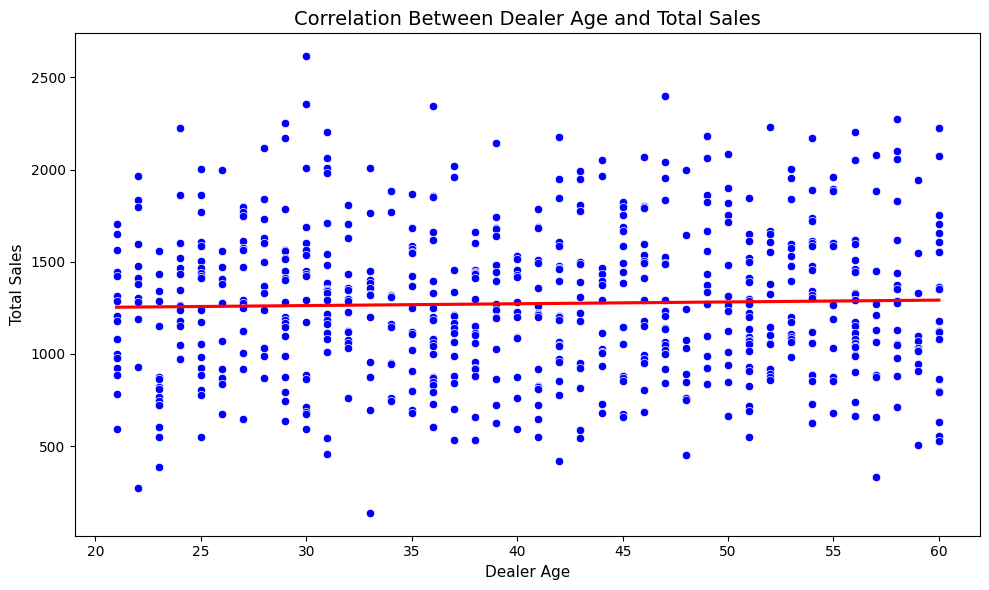

In [ ]:
result = execute_query(query_task18)

correlation = result['Dealer Age'].corr(result['total_sales'])
print(f"Koefisien Korelasi antara Dealer Age dan Total Sales: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dealer Age", y="total_sales", data=result, color="blue")

# Add reg line
sns.regplot(x="Dealer Age", y="total_sales", data=result, scatter=False, color="red", ci=None)

# Add title
plt.title('Correlation Between Dealer Age and Total Sales', fontsize=14)
plt.xlabel('Dealer Age', fontsize=11)
plt.ylabel('Total Sales', fontsize=11)

plt.tight_layout()
plt.show()

##### Task 9: Product Sales and Margin Analysis
_Objective: Analyze sales and margin for each product._

In [ ]:
query_task19 = """
SELECT
    s."Product",
    SUM(s."Sales") AS total_sales,
    p."Margin",
    SUM(s."Sales" * p."Margin") AS total_margin
FROM salesdata s
LEFT JOIN productdata p USING ("Product")
GROUP BY s."Product", p."Margin"
ORDER BY s."Product";
"""
display(execute_query(query_task19))

,Product,total_sales,Margin,total_margin
0,1001,477.0,12,5724.0
1,1002,199.0,12,2388.0
2,1003,161.0,14,2254.0
3,1004,166.0,14,2324.0
4,1005,428.0,11,4708.0
...,...,...,...,...
1988,2996,510.0,11,5610.0
1989,2997,266.0,10,2660.0
1990,2998,279.0,13,3627.0
1991,2999,269.0,15,4035.0


Koefisien Korelasi antara total_margin dan Total Sales: 0.96


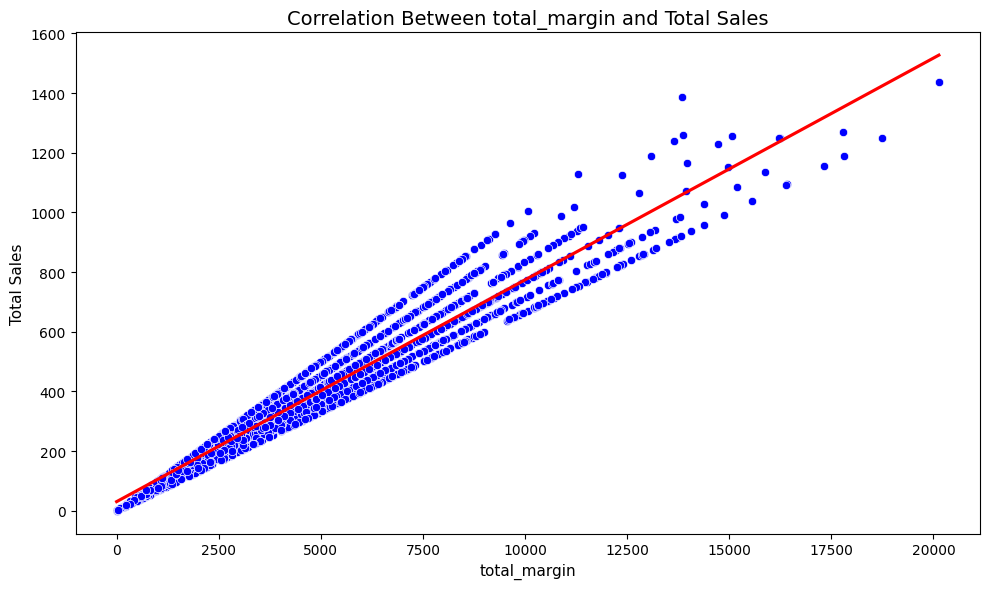

In [ ]:
result = execute_query(query_task19)

correlation = result['total_margin'].corr(result['total_sales'])
print(f"Koefisien Korelasi antara total_margin dan Total Sales: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_margin", y="total_sales", data=result, color="blue")

# Add reg line
sns.regplot(x="total_margin", y="total_sales", data=result, scatter=False, color="red", ci=None)

# Add title
plt.title('Correlation Between total_margin and Total Sales', fontsize=14)
plt.xlabel('total_margin', fontsize=11)
plt.ylabel('Total Sales', fontsize=11)

plt.tight_layout()
plt.show()

##### Task 10: Sequential Invoice Analysis
_Objective: Analyze the sequential order of invoices for each dealer._

In [ ]:
query_task20 = """
SELECT
    p."DealerName",
    p."InvoiceNo",
    STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d') as PaymentDate,
    ROW_NUMBER() OVER (PARTITION BY p."DealerName" ORDER BY STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d')) AS invoice_sequence
FROM paymentdata p
JOIN dealerdata d ON p."DealerName" = d."Dealer"
ORDER BY p."DealerName", STRPTIME(CAST(p."PaymentDate" AS VARCHAR), '%Y-%m-%d');
"""
display(execute_query(query_task20))

,DealerName,InvoiceNo,PaymentDate,invoice_sequence
0,1001,100969,2020-01-30,1
1,1001,102602,2020-02-01,2
2,1001,101414,2020-02-04,3
3,1001,102303,2020-02-12,4
4,1001,103058,2020-02-13,5
...,...,...,...,...
8253,1650,107700,2020-02-25,7
8254,1650,100606,2020-02-27,8
8255,1650,105770,2020-03-01,9
8256,1650,105918,2020-03-13,10
